# COVID-19 Data analysis for France, Johns Hopkins Univerity (JHU) data source

Data extract from github https://github.com/CSSEGISandData/COVID-19.git provided by JHU(johns-hopkins-university) CSSE USA.

Datasets are directly extracted from online repository (CSSE github) to then display charts for the dataset and extra figure from analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

# import local functions
import covid19_analysis.dataFun as df
import covid19_analysis.dataPlot as dplot

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Define path from online repo
repo_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
cases_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
recov_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
death_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

# Get data from online repo
df_c=pd.read_csv(repo_url+cases_path)
df_d=pd.read_csv(repo_url+death_path)
df_r=pd.read_csv(repo_url+recov_path)

## Load data for France

From dataset get french magnitudes over time, they might be only mainland or the sum of mailand + its islands

In [17]:
# Extract all info for mainland France (exclude all other islands)
c_study = 'France'

# Get a timeseries with country data (last argument "mainland" is True by default)
ctry_cases = df.get_timeseries_from_JHU(df_c, c_study)
ctry_death = df.get_timeseries_from_JHU(df_d, c_study)
ctry_recov = df.get_timeseries_from_JHU(df_r, c_study)

In [24]:
# For Europe, interesting data start from Feb 23, 2020
start_date = '2020-2-23'
mask = ctry_cases.index > start_date

Report the current situation in France

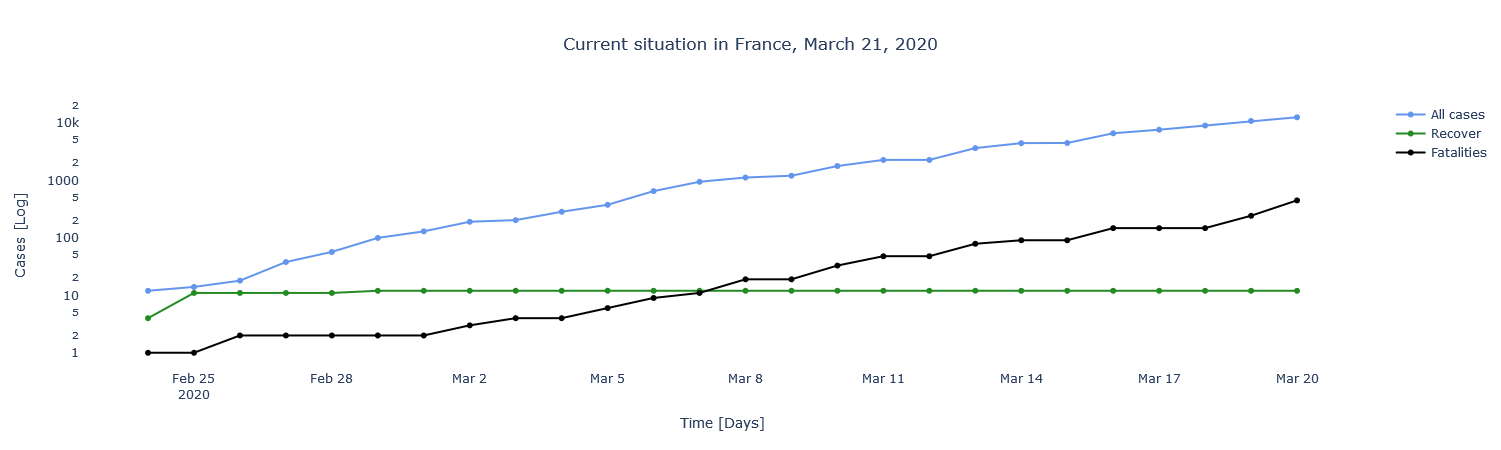

In [32]:
dplot.disp_cum_jhu(ctry_cases, ctry_recov, ctry_death, c_study, mask)

The currenty tendency (March 2020) for the french data consist in a constant exponential growing over time. Data on regard to recoveries has stopped and fatalies are still growing as well.

## Check recoveries and fatalities rates & daily evolution

For daily evolution in France the recoveries data is not up to day (goverment politics) and fatality rate tends to decrease over time

In [8]:
rate_recov_d = df.safe_div(ctry_recov.values, ctry_cases.values) *100
rate_death_d = df.safe_div(ctry_death.values, ctry_cases.values) *100

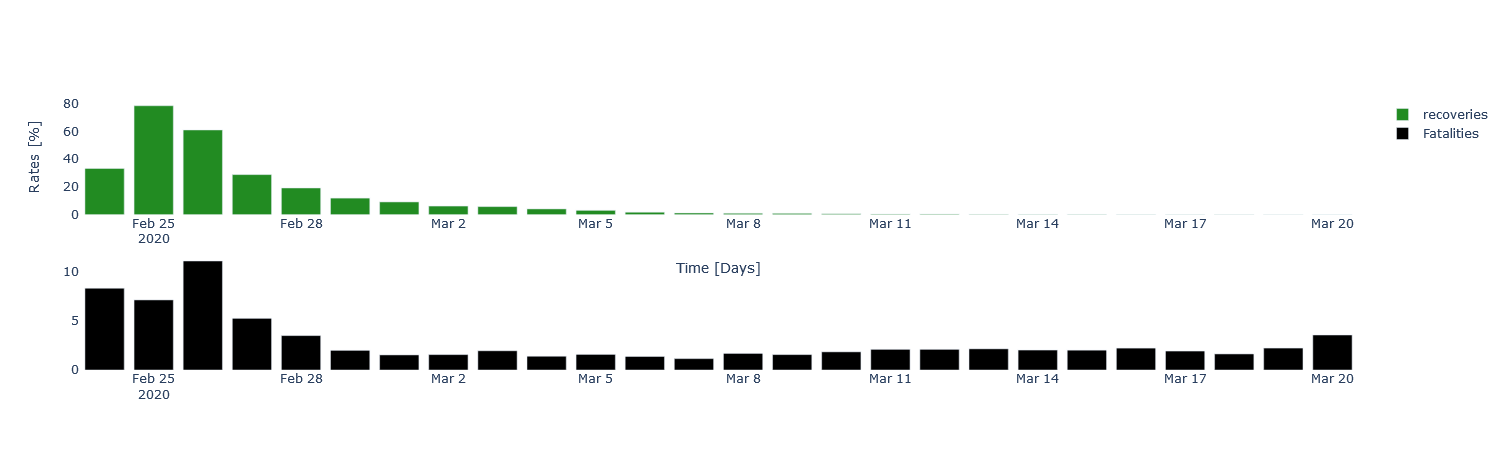

In [9]:
# display rates
fig = make_subplots(rows=2, cols=1)

fig.add_bar(
    row=1, col=1,
    x = ctry_cases.index[mask],
    y = rate_recov_d[mask],
    name = 'recoveries',
    marker = dict(color = 'forestgreen')
    )
fig.add_bar(
    row=2, col=1,
    x = ctry_cases.index[mask],
    y = rate_death_d[mask],
    name = 'Fatalities',
    marker = dict(color = 'Black')
)
fig.update_layout(
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Rates [%]',
    plot_bgcolor='white')

Data is shown from 23 Feb 2020, since previous data does not display the disease evolution in the country.

Total death cases has reach a tendency value around ~2 % over the past two weeks. It correspond to a low death ratio compare to the spread in China. However, the statistics on deaths from corona are calculated on the current population infected, a better number can be calculated on regard to the number of close cases and not only open cases (current infected population)

In [10]:
# Daily cases in France
cases_d_fr = ctry_cases.values[1:]-ctry_cases.values[:ctry_cases.size-1]
cases_d_fr = np.insert(cases_d_fr, 0, ctry_cases.values[0])

# Daily recovery
recov_d_fr = ctry_recov.values[1:]-ctry_recov.values[:ctry_recov.size-1]
recov_d_fr = np.insert(recov_d_fr, 0, ctry_recov.values[0])

# Daily death
death_d_fr = ctry_death.values[1:]-ctry_death.values[:ctry_death.size-1]
death_d_fr = np.insert(death_d_fr, 0, ctry_death.values[0])

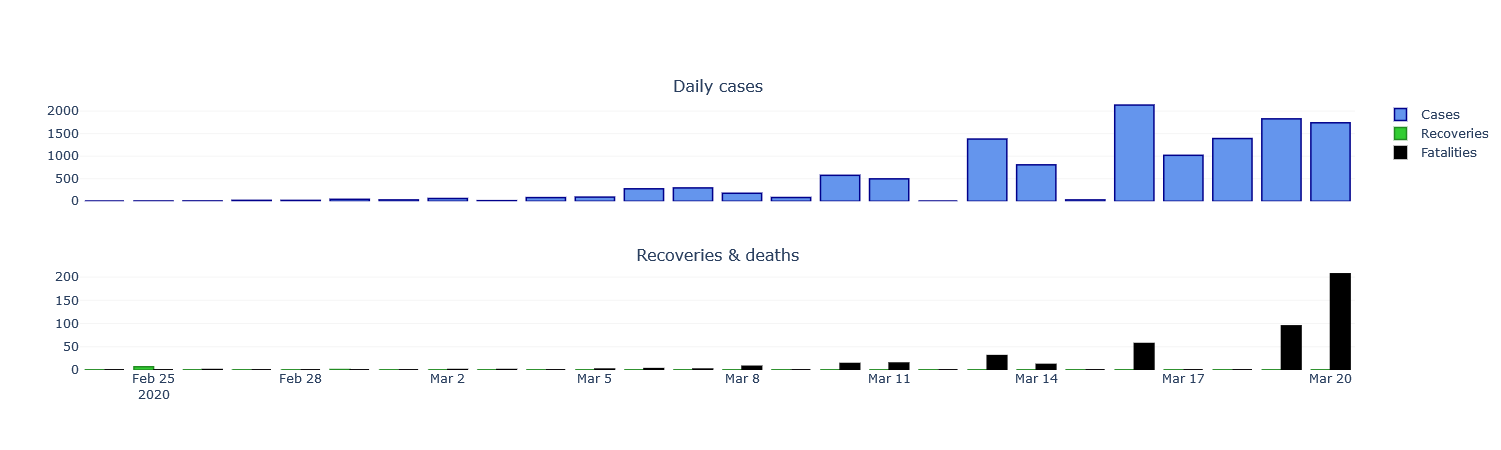

In [11]:
# display daily results into two columns
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    subplot_titles = ('Daily cases', 'Recoveries & deaths')
                    )
# daily cases
fig.add_trace(go.Bar(
    x = ctry_cases.index[mask],
    y = cases_d_fr[mask],
    marker = dict(color = 'CornflowerBlue', line = dict(color = 'DarkBlue', width=1.5)),
    name = 'Cases'
    ),
    #secondary_y = False,
    row=1, col=1
)
# daily recoveries
fig.add_trace(go.Bar(
    x = ctry_recov.index[mask],
    y = recov_d_fr[mask],
    marker = dict(color = 'LimeGreen', line = dict(color = 'ForestGreen', width=1.5)),
    name = 'Recoveries'
    ),
    #secondary_y = False,
    row=2, col=1
)
# daily deaths
fig.add_trace(go.Bar(
    x = ctry_death.index[mask],
    y = death_d_fr[mask],
    marker = dict(color = 'black', line = dict(color = 'black', width=1.5)),
    name = 'Fatalities'
    ),
    #secondary_y = True,              
    row=2, col=1
)

fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

### Calculate the real cases using fatality cases & extra asumptions

In [12]:
# asumptions
Ro = 2.5 # ratio of infection, 
days2death = 20
fatality_ratio = .01

In [13]:
time_v = np.array(range(0,50))
NCo = 10
nc_v = np.array(time_v.size)

t0 = 0
nc_v = np.floor(1 + np.clip((time_v-t0)/Ro, 0, None))
nc_v

array([ 1.,  1.,  1.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  5.,  5.,  5.,
        6.,  6.,  7.,  7.,  7.,  8.,  8.,  9.,  9.,  9., 10., 10., 11.,
       11., 11., 12., 12., 13., 13., 13., 14., 14., 15., 15., 15., 16.,
       16., 17., 17., 17., 18., 18., 19., 19., 19., 20., 20.])